### Import LIB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from six import StringIO
import pydotplus
from sklearn.tree import export_graphviz,DecisionTreeClassifier
from IPython.display import Image
import graphviz
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('car-mpg.csv')
data.sample(10)

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
74,13.0,8,302.0,140,4294,16.0,72,1,0,ford gran torino (sw)
151,31.0,4,79.0,67,2000,16.0,74,2,1,fiat x1.9
62,13.0,8,350.0,165,4274,12.0,72,1,0,chevrolet impala
211,16.5,6,168.0,120,3820,16.7,76,2,0,mercedes-benz 280s
252,19.2,6,231.0,105,3535,19.2,78,1,0,pontiac phoenix lj
303,31.8,4,85.0,65,2020,19.2,79,3,1,datsun 210
293,31.9,4,89.0,71,1925,14.0,79,2,1,vw rabbit custom
152,19.0,6,225.0,95,3264,16.0,75,1,0,plymouth valiant custom
78,21.0,4,120.0,87,2979,19.5,72,2,1,peugeot 504 (sw)
261,18.1,6,258.0,120,3410,15.1,78,1,0,amc concord d/l


In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
data.tail()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
393,27.0,4,140.0,86,2790,15.6,82,1,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,1,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,1,ford ranger
397,31.0,4,119.0,82,2720,19.4,82,1,1,chevy s-10


In [5]:
len(data['car_name'].value_counts())

305

In [6]:
data.drop('car_name',axis=1,inplace=True)

In [7]:
data.shape

(398, 9)

In [8]:
data['car_type'].value_counts()

1    211
0    187
Name: car_type, dtype: int64

In [9]:
data.dtypes

mpg         float64
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
origin        int64
car_type      int64
dtype: object

In [10]:
data['car_type']=data['car_type'].astype('category')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   mpg       398 non-null    float64 
 1   cyl       398 non-null    int64   
 2   disp      398 non-null    float64 
 3   hp        398 non-null    object  
 4   wt        398 non-null    int64   
 5   acc       398 non-null    float64 
 6   yr        398 non-null    int64   
 7   origin    398 non-null    int64   
 8   car_type  398 non-null    category
dtypes: category(1), float64(3), int64(4), object(1)
memory usage: 25.5+ KB


In [18]:
data['hp'].value_counts().head(3)

150    22
90     20
88     19
Name: hp, dtype: int64

In [19]:
data['hp']=data['hp'].replace({"?":150})

In [20]:
data['hp']=data['hp'].astype('float64')

In [21]:
for i in data.columns:
    print(i," : ",sum((data[i]=="?") |(data[i]==":" )|(data[i]=="-")))

mpg  :  0
cyl  :  0
disp  :  0
hp  :  0
wt  :  0
acc  :  0
yr  :  0
origin  :  0
car_type  :  0


In [22]:
data.isna().sum()

mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
car_type    0
dtype: int64

In [23]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398.0,NaN,NaN,NaN,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cyl,398.0,NaN,NaN,NaN,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,NaN,NaN,NaN,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,NaN,NaN,NaN,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,NaN,NaN,NaN,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,NaN,NaN,NaN,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,NaN,NaN,NaN,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,NaN,NaN,NaN,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0
car_type,398.0,2.0,1.0,211.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

<AxesSubplot:>

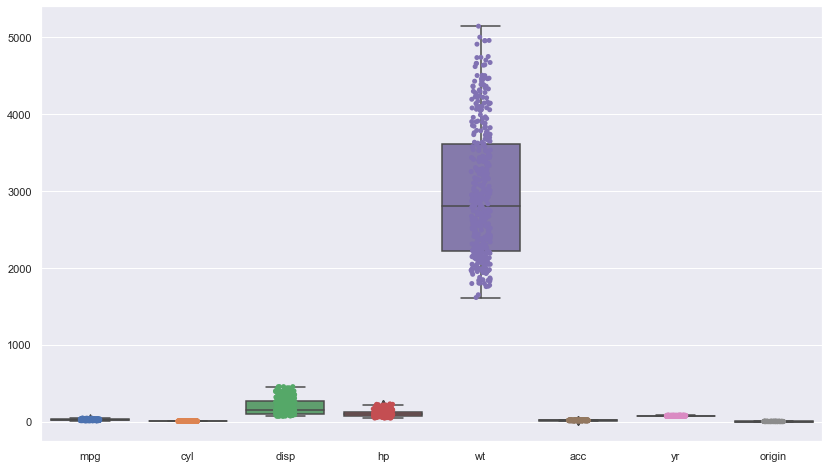

In [27]:
sns.set(rc={'figure.figsize':(14,8)})
sns.boxplot(data=data.iloc[:,:-1])
sns.stripplot(data=data.iloc[:,:-1])

#### There is no outliers

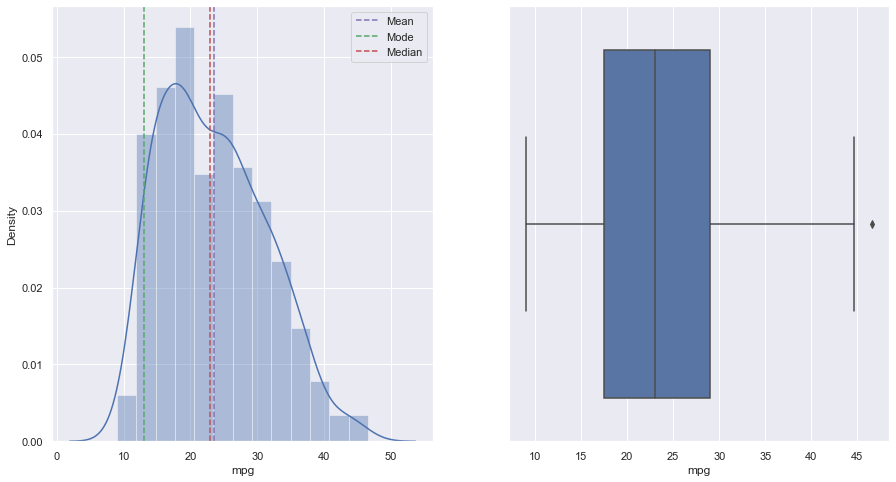

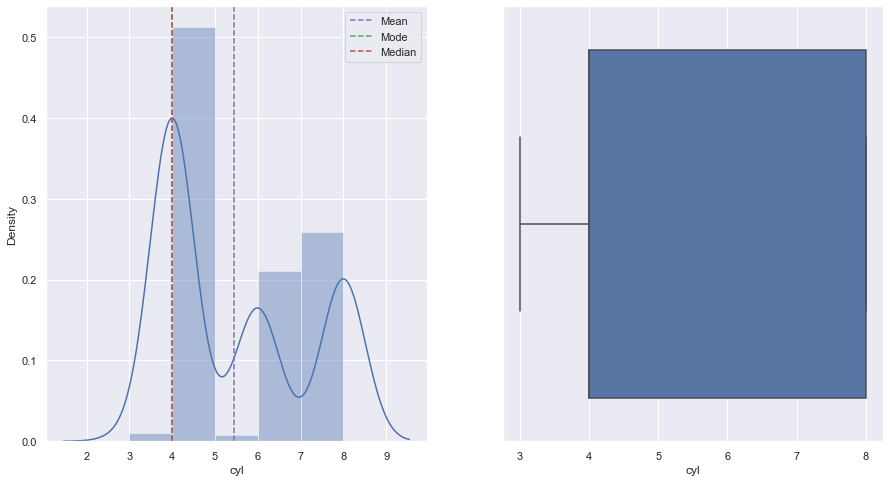

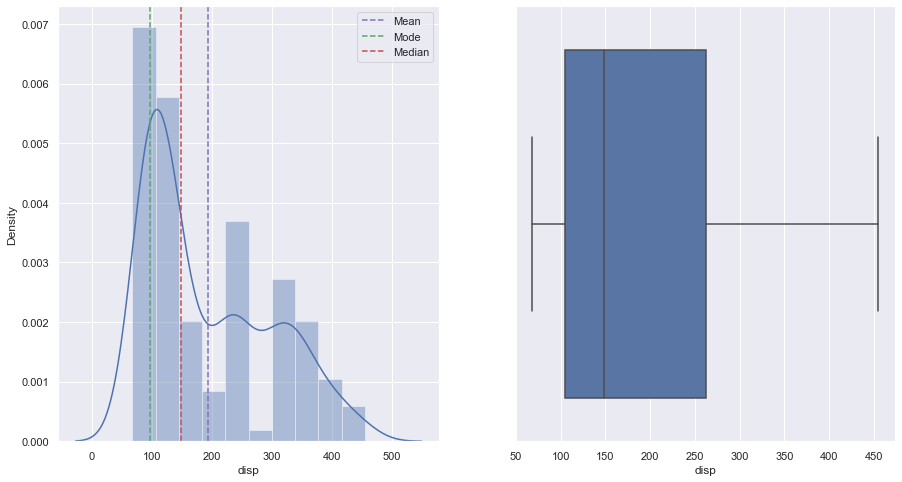

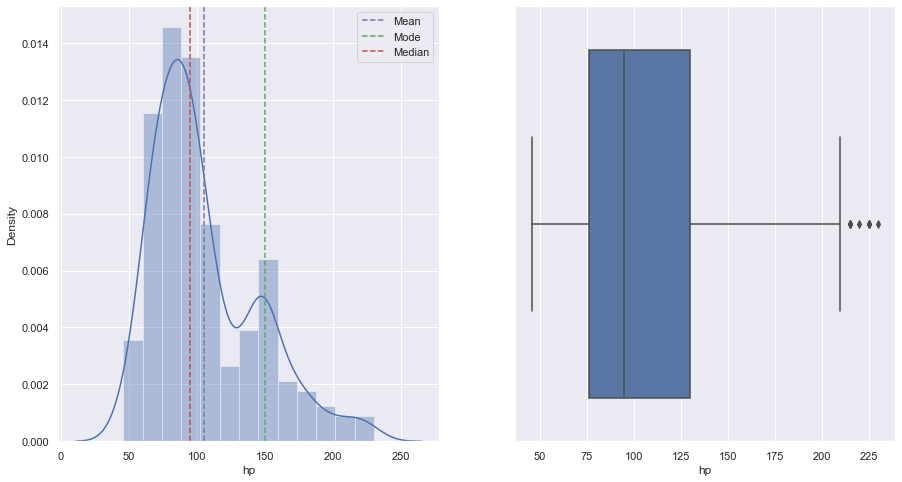

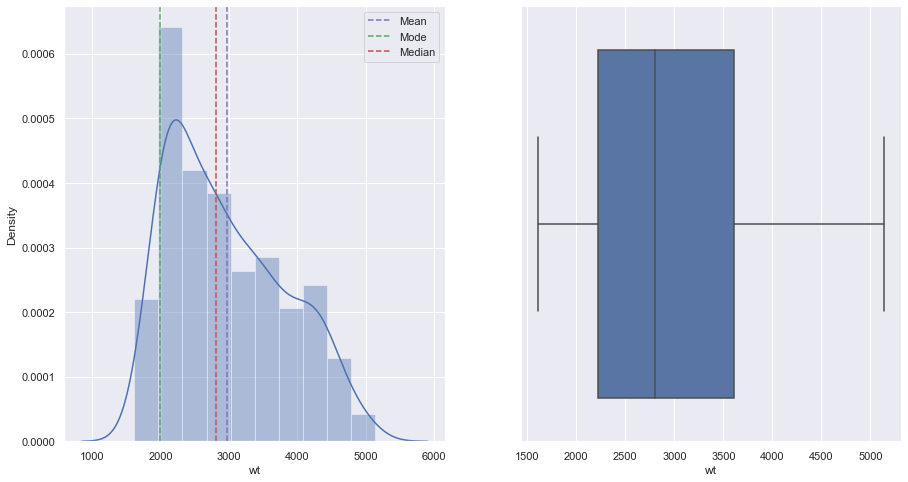

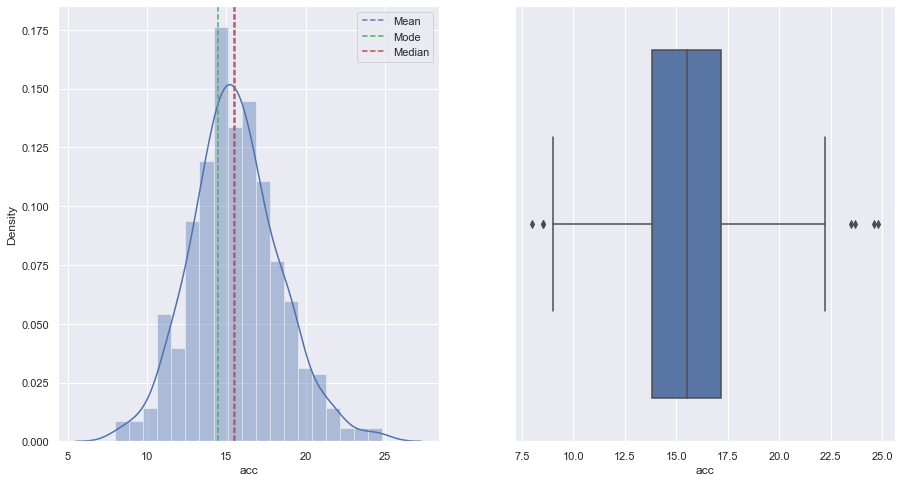

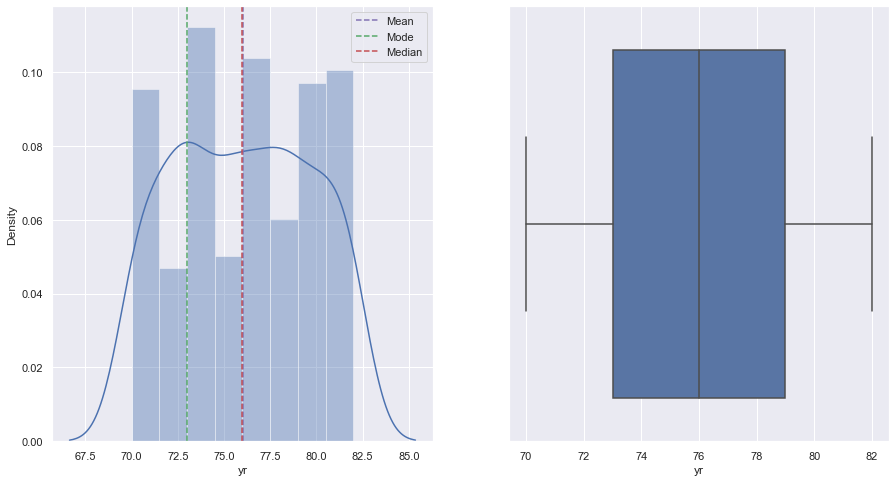

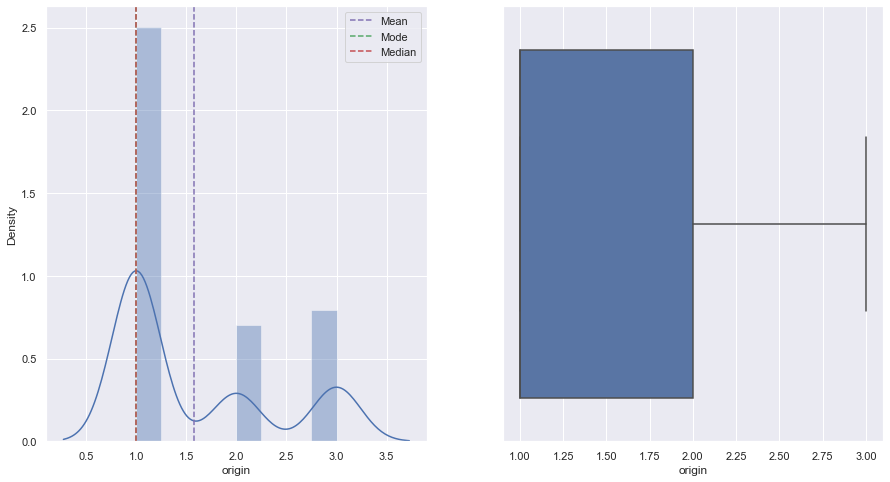

In [35]:
for i, var in enumerate(data.iloc[:,:-1].columns):
    fig,ax=plt.subplots(1,2,figsize=(15,8))
    sns.distplot(data[var],ax=ax[0])
    ax[0].axvline(data[var].mean(),linestyle="--",color='m',label="Mean")
    ax[0].axvline(data[var].mode()[0],linestyle="--",color='g',label="Mode")
    ax[0].axvline(data[var].median(),linestyle="--",color='r',label='Median')
    sns.boxplot(data[var],ax=ax[1])
    ax[0].legend()
    plt.show()

In [48]:
for i in data.iloc[:,:-1].columns:
    print(i," has the skewness of : ",data[i].skew())

mpg  has the skewness of :  0.45706634399491913
cyl  has the skewness of :  0.5269215453528939
disp  has the skewness of :  0.7196451643005952
hp  has the skewness of :  1.0330029083003485
wt  has the skewness of :  0.5310625125994629
acc  has the skewness of :  0.27877684462588986
yr  has the skewness of :  0.01153459401509278
origin  has the skewness of :  0.9237762994760227


<AxesSubplot:xlabel='car_type', ylabel='count'>

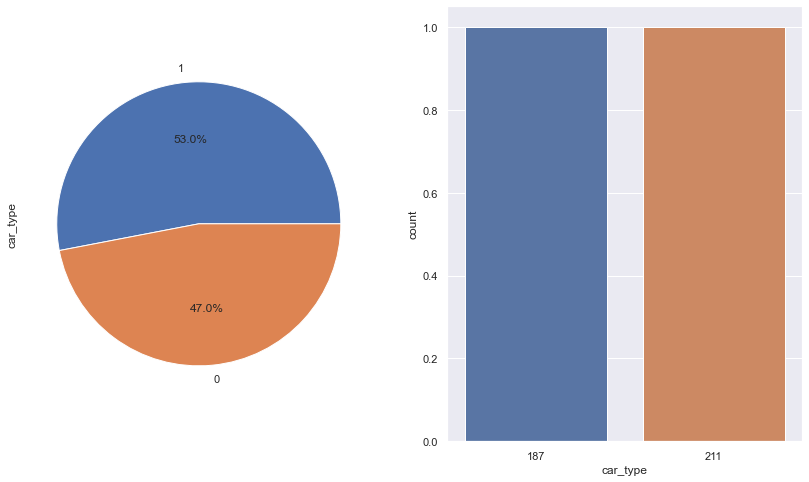

In [36]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,8))
data['car_type'].value_counts().plot(kind='pie',autopct='%1.1f%%',ax=ax1)
sns.countplot(data['car_type'].value_counts())

In [37]:
data.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin', 'car_type'], dtype='object')

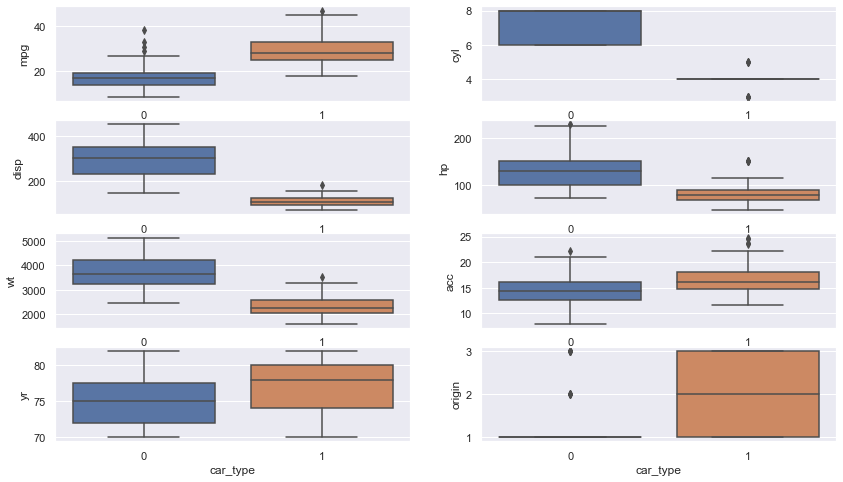

In [42]:
for i, var in enumerate(data.iloc[:,:-1].columns):
    plt.subplot(4,2,i+1)
    sns.boxplot(data['car_type'],data[var])

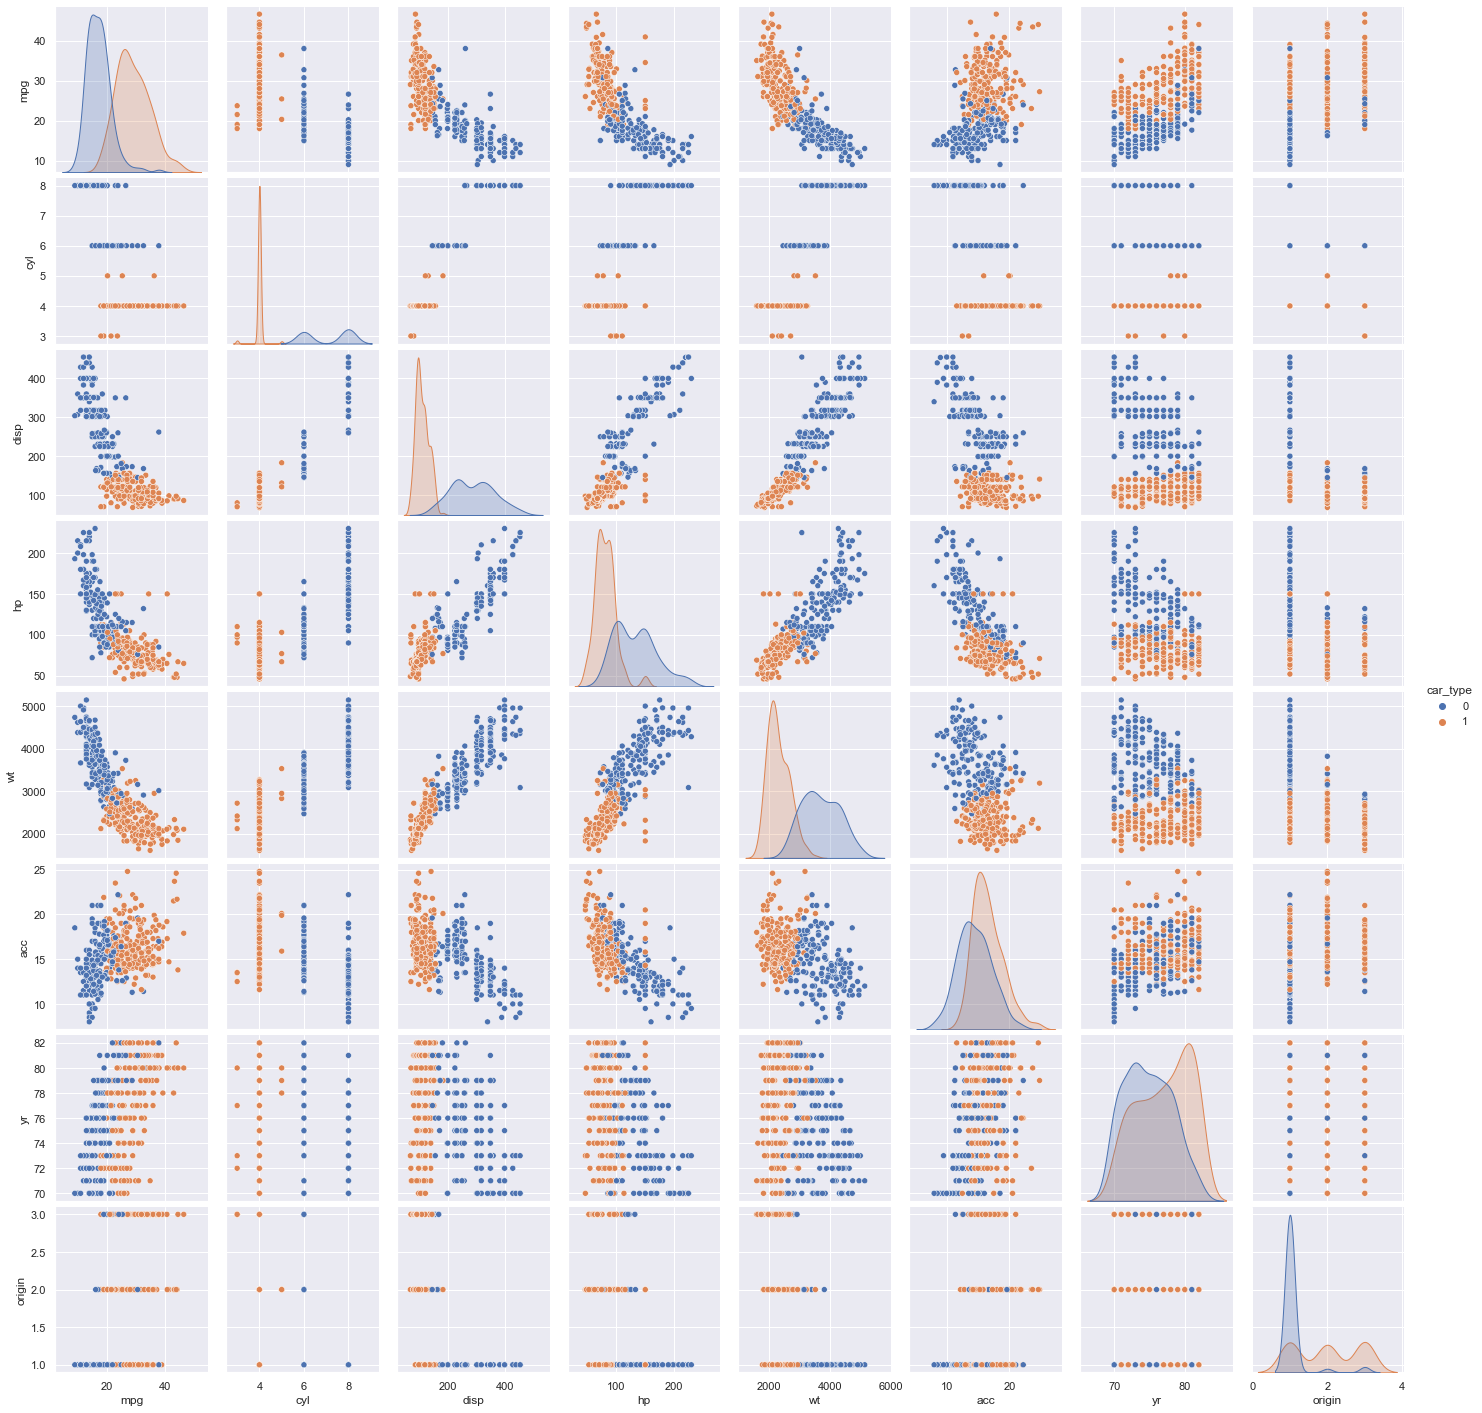

In [45]:
sns.pairplot(data=data,hue='car_type')

<AxesSubplot:>

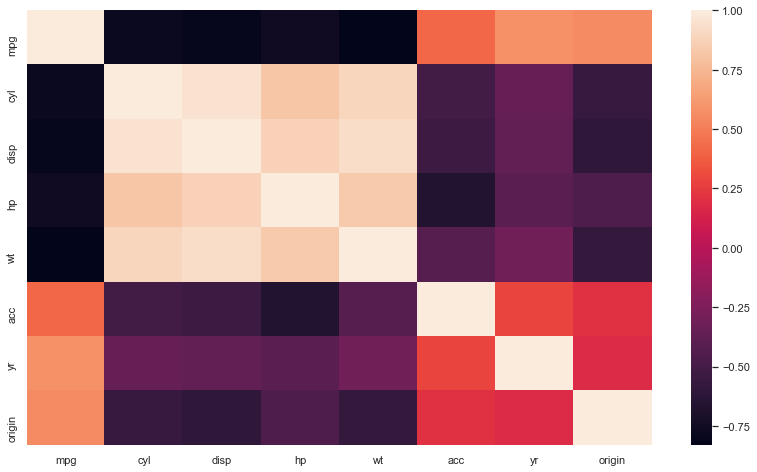

In [47]:
sns.heatmap(data.corr())

In [46]:
data.corr().style.background_gradient('coolwarm')

,mpg,cyl,disp,hp,wt,acc,yr,origin
mpg,1.000000,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,0.563450
cyl,-0.775396,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.562543
disp,-0.804203,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.609409
hp,-0.753177,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.454271
wt,-0.831741,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.581024
acc,0.420289,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.205873
yr,0.579267,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.454271,-0.581024,0.205873,0.180662,1.000000


In [49]:
from statsmodels.stats.weightstats import ztest

In [52]:
for i in data.iloc[:,:-1].columns:
    x=data[data['car_type']==0][i]
    y=data[data['car_type']==1][i]
    z_test,pval=ztest(x,y)
    if pval<0.05:
        print("Reject ",i,"p values: ",pval)
    else:
        print('Fail to Reject ',i,"pval :",pval)

Reject  mpg p values:  3.3828745532157774e-119
Reject  cyl p values:  0.0
Reject  disp p values:  2.4697599952935618e-236
Reject  hp p values:  1.673254467767717e-76
Reject  wt p values:  6.220502215164856e-173
Reject  acc p values:  9.896239772289696e-17
Reject  yr p values:  1.799491770476071e-10
Reject  origin p values:  6.163831654108818e-44


In [55]:
scaler=MinMaxScaler()
data.iloc[:,:-1]=scaler.fit_transform(data.iloc[:,:-1])

### Model

In [57]:
x=data.iloc[:,:-1]
y=data[['car_type']]

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.30)

In [61]:
tree1=DecisionTreeClassifier()
tree1.fit(x_train,y_train)
print('Train score: ',tree1.score(x_train,y_train))
print('Test score: ',tree1.score(x_test,y_test))

Train score:  1.0
Test score:  1.0


In [64]:
print('Feature Importance :',pd.DataFrame(tree1.feature_importances_,index=x_train.columns))

Feature Importance :           0
mpg     0.0
cyl     1.0
disp    0.0
hp      0.0
wt      0.0
acc     0.0
yr      0.0
origin  0.0


In [66]:
from sklearn import metrics

In [67]:
yhat=tree1.predict(x_test)
metrics.accuracy_score(y_test,yhat)

1.0

In [69]:
print(metrics.classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



<AxesSubplot:>

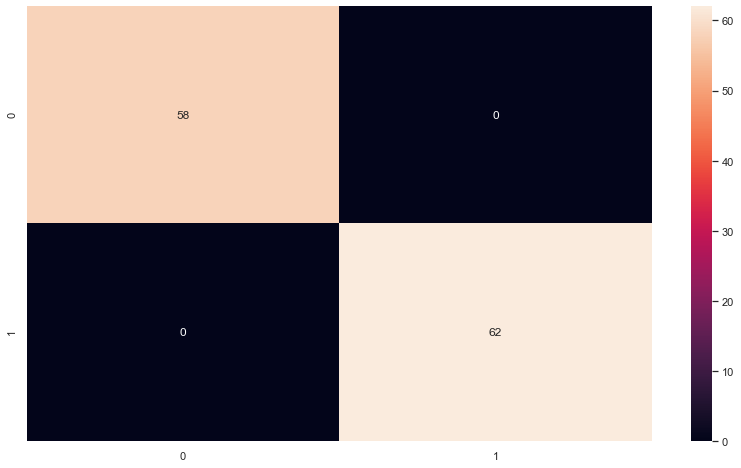

In [73]:
sns.heatmap(pd.DataFrame((metrics.confusion_matrix(y_test,yhat))),annot=True)

In [74]:
dot_Data=StringIO()
features=x_train.columns

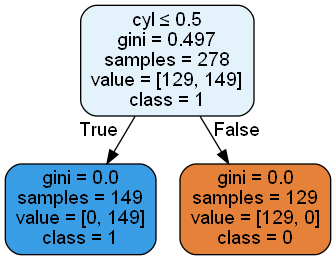

In [89]:
export_graphviz(tree1,out_file=dot_Data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_Data.getvalue())  
Image(graph.create_png())